In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import *
from matplotlib.pyplot import figure


In [2]:
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [3]:
Complete_HWC_Data = pd.read_csv("/Users/nerdbear/Downloads/Complete_HWC_Data.csv", index_col=0, dtype=str)


In [4]:
Complete_HWC_Data["Sum of Number of Animals"] = Complete_HWC_Data["Sum of Number of Animals"].astype("float")

Complete_HWC_Data["Total Staff Hours"] = Complete_HWC_Data["Total Staff Hours"].astype("float")

Complete_HWC_Data["Total Staff Involved"] = Complete_HWC_Data["Total Staff Involved"].astype("float")

Complete_HWC_Data["Latitude Public"] = Complete_HWC_Data["Latitude Public"].astype("float")

Complete_HWC_Data["Longitude Public"] = Complete_HWC_Data["Longitude Public"].astype("float")

Complete_HWC_Data[Complete_HWC_Data.columns[20:170]] = Complete_HWC_Data[Complete_HWC_Data.columns[20:170]].astype("float")



In [5]:
Complete_HWC_Data.head()

,UniqueID,Incident Number,Incident Date,Field Unit,Protected Heritage Area,Incident Type,Latitude Public,Longitude Public,Within Park,Total Staff Involved,Total Staff Hours,Species Common Name,Sum of Number of Animals,Animal Health Status,Cause of Animal Health Status,Animal Behaviour,Reason for Animal Behaviour,Animal Attractant,Deterrents Used,Animal Response to Deterrents,Activity Type_Avoidance,Activity Type_Backpacking – Multiday Trips,Activity Type_Beach Recreation,Activity Type_Biking / Walking,Activity Type_Boating - Coastal/Marine,Activity Type_Boating - Commercial,Activity Type_Boating - Motorized Pleasure Craft,Activity Type_Bush Party,Activity Type_Camping - Backcountry,Activity Type_Camping - Frontcountry,Activity Type_Camping - Huts and Lodges,Activity Type_Camping - Winter Frontcountry,Activity Type_Camping-Frontcountry,Activity Type_Canoeing - Flatwater,Activity Type_Canoeing - Swiftwater,Activity Type_Canyoneering,Activity Type_Climbing - Mountaineering,Activity Type_Climbing - Technical Rock,Activity Type_Climbing - Waterfall Ice,Activity Type_Commercial Transportation Operation,Activity Type_Cycling,Activity Type_Cycling - Mountain Biking,Activity Type_Cycling - Road/Shared Path,Activity Type_Cycling - Winter,Activity Type_Docking - TINP Only,Activity Type_Dog Walking,Activity Type_Dogsledding,Activity Type_Domestic Residence Activity,Activity Type_Driving,Activity Type_Field Sports,Activity Type_Fishing,Activity Type_Flight - HETS,Activity Type_Flight - Hang-gliding/Parapenting,Activity Type_Flight - Helicopter,Activity Type_Flight - Sightseeing/Site Access,Activity Type_Golfing,Activity Type_Heritage Activity - Bird Watching,Activity Type_Heritage Activity - History Activities,Activity Type_Heritage Activity - Photography and Art,Activity Type_Heritage Activity - Sightseeing,Activity Type_Heritage Activity - Wildlife Observation,Activity Type_Hiking,Activity Type_Hiking / Walking,Activity Type_Hiking/Walking,Activity Type_Horse Riding - Day Trip,Activity Type_Horse Riding - Multiday,Activity Type_Ice Skating,Activity Type_Kayaking - Coastal,Activity Type_Kayaking - Flatwater,Activity Type_Kayaking - Swiftwater,Activity Type_Mooring,Activity Type_Niking / Walking,Activity Type_Not Applicable,Activity Type_Orienteering / Geocaching,Activity Type_Other,Activity Type_Paddleboarding - Coastal,Activity Type_Paddleboarding - Flatwater,Activity Type_Park Operations,Activity Type_Park Ops - Avalanche Forecasting,Activity Type_Park Ops - Avalanche Control,Activity Type_Park Ops - Search and Rescue,Activity Type_Park Ops - Training,Activity Type_Picknicking / BBQ,Activity Type_Picnicking / BBQ,Activity Type_Picnicking/BBQ,Activity Type_Playground Activities,Activity Type_Rafting - Flatwater,Activity Type_Rafting - Swiftwater,Activity Type_Railway,Activity Type_Research - Scientific/Social,Activity Type_Resource Harvesting - Hunting,Activity Type_Resource Harvesting - Hunting/Fishing/Gathering/Trapping,Activity Type_Roller Sports,Activity Type_Running - Road,Activity Type_Running - Trail,Activity Type_Sail Sports - Wind / Kite Surfing,Activity Type_Scrambling,Activity Type_Sightseeing,Activity Type_Skiing - Crosscountry,Activity Type_Skiing/Boarding - Backcountry,Activity Type_Skiing/Boarding - Ski Resort In Bounds,Activity Type_Skiing/Boarding - Ski Resort Out of Bounds,Activity Type_Sledding/Tobogganning,Activity Type_Snowmobiling,Activity Type_Snowshoeing,Activity Type_Special Event - Participative Audience,Activity Type_Special Events - Passive Audience,Activity Type_Stakeholder Operations,Activity Type_Surfing,Activity Type_Swimming - Cliff Jumping,Activity Type_Swimming - Coastal,Activity Type_Swimming - Facilities,Activity Type_Swimming - Flat Water,Activity Type_Swimming - Swiftwater,Activity Type_Townsite Activity,Activity Type_Tram/Ski Lift/Gondola,Activity Type_Tubing / River Drifting,Activity Type_Unknown,Activity Type_Via-Ferrata,Activity Type_Wiking / Walking,Activity Type_nan,Response Type_Assist Visito

In [31]:
Complete_HWC_Data_Month = Complete_HWC_Data.loc[:, ("Incident Type", "Field Unit", "Incident Date")]
Complete_HWC_Data_Month["Incident Month"] = pd.to_datetime(Complete_HWC_Data_Month["Incident Date"]).dt.to_period("M")
Complete_HWC_Data_Month["Incident Month"] = Complete_HWC_Data_Month["Incident Month"].astype("str")
Complete_HWC_Data_Month["Incident Month"] = pd.to_datetime(Complete_HWC_Data_Month["Incident Month"])
Complete_HWC_Data_Month



,Incident Type,Field Unit,Incident Date,Incident Month
0,Human Wildlife Interaction,Banff Field Unit,2010-01-01,2010-01-01
1,Human Wildlife Interaction,Banff Field Unit,2010-01-01,2010-01-01
2,Human Wildlife Interaction,Banff Field Unit,2010-01-01,2010-01-01
3,Rescued/Recovered/Found Wildlife,Jasper Field Unit,2010-01-01,2010-01-01
4,Attractant,Jasper Field Unit,2010-01-01,2010-01-01
...,...,...,...,...
73653,Human Wildlife Interaction,Jasper Field Unit,2021-12-31,2021-12-01
73654,Human Wildlife Interaction,Jasper Field Unit,2021-12-31,2021-12-01
73655,Highway Fence Intrusion,Banff Field Unit,2021-06-19,2021-06-01
73656,Rescued/Recovered/Found Wildlife,Prince Edward Island Field Unit,2011-07-08,2011-07-01


In [73]:
#Banff Field Unit, Number of Incident Types per month Time Series

Banff_RRFW = Complete_HWC_Data_Month.loc[(Complete_HWC_Data_Month["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Month["Incident Type"] == "Rescued/Recovered/Found Wildlife")]
Banff_RRFW_PLOT = Banff_RRFW["Incident Type"].groupby(Banff_RRFW["Incident Month"]).count()

Banff_HWI = Complete_HWC_Data_Month.loc[(Complete_HWC_Data_Month["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Month["Incident Type"] == "Human Wildlife Interaction")]
Banff_HWI_PLOT = Banff_HWI["Incident Type"].groupby(Banff_HWI["Incident Month"]).count()

Banff_WS = Complete_HWC_Data_Month.loc[(Complete_HWC_Data_Month["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Month["Incident Type"] == "Wildlife Sighting")]
Banff_WS_PLOT = Banff_WS["Incident Type"].groupby(Banff_WS["Incident Month"]).count()

Banff_MI = Complete_HWC_Data_Month.loc[(Complete_HWC_Data_Month["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Month["Incident Type"] == "Management Intervention")]
Banff_MI_PLOT = Banff_MI["Incident Type"].groupby(Banff_MI["Incident Month"]).count()

Banff_HFI = Complete_HWC_Data_Month.loc[(Complete_HWC_Data_Month["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Month["Incident Type"] == "Highway Fence Intrusion")]
Banff_HFI_PLOT = Banff_HFI["Incident Type"].groupby(Banff_HFI["Incident Month"]).count()

Banff_H = Complete_HWC_Data_Month.loc[(Complete_HWC_Data_Month["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Month["Incident Type"] == "Harassment")]
Banff_H_PLOT = Banff_H["Incident Type"].groupby(Banff_H["Incident Month"]).count()

Banff_A = Complete_HWC_Data_Month.loc[(Complete_HWC_Data_Month["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Month["Incident Type"] == "Attractant")]
Banff_A_PLOT = Banff_A["Incident Type"].groupby(Banff_A["Incident Month"]).count()

Banff_NW = Complete_HWC_Data_Month.loc[(Complete_HWC_Data_Month["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Month["Incident Type"] == "Nuisance Wildlife")]
Banff_NW_PLOT = Banff_NW["Incident Type"].groupby(Banff_NW["Incident Month"]).count()

Banff_DA = Complete_HWC_Data_Month.loc[(Complete_HWC_Data_Month["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Month["Incident Type"] == "Domestic Animal")]
Banff_DA_PLOT = Banff_DA["Incident Type"].groupby(Banff_DA["Incident Month"]).count()


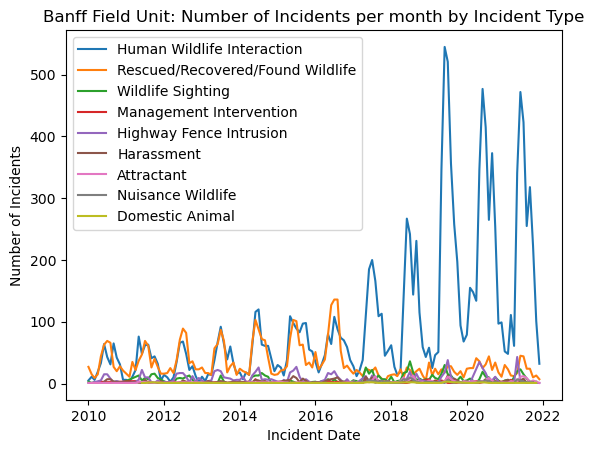

In [71]:
###Modify the month plots to be grouped by month per year - 
#so count is of all incidents in september of each year. 
#I think for this we would want the month value to just be 1, 2, 3, 4, etc. 
#(see earlier draft that generated that) 
#likely still need to convert the value back to "Datetime" so see how that works.... 
#maybe we can just convert to integer if there's an issue, but we want the month name to show up on the labels. 


plt.plot(Banff_HWI_PLOT, label = "Human Wildlife Interaction")
plt.plot(Banff_RRFW_PLOT, label = "Rescued/Recovered/Found Wildlife")
plt.plot(Banff_WS_PLOT, label = "Wildlife Sighting")
plt.plot(Banff_MI_PLOT, label = "Management Intervention")
plt.plot(Banff_HFI_PLOT, label = "Highway Fence Intrusion")
plt.plot(Banff_H_PLOT, label = "Harassment")
plt.plot(Banff_A_PLOT, label = "Attractant")
plt.plot(Banff_NW_PLOT, label = "Nuisance Wildlife")
plt.plot(Banff_DA_PLOT, label = "Domestic Animal")
plt.xlabel("Incident Date")
plt.ylabel("Number of Incidents")
plt.legend(loc="upper left")
plt.title("Banff Field Unit: Number of Incidents per month by Incident Type")
plt.show()

In [72]:
Complete_HWC_Data_Year = Complete_HWC_Data.loc[:, ("Incident Type", "Field Unit", "Incident Date")]
Complete_HWC_Data_Year["Incident Year"] = pd.to_datetime(Complete_HWC_Data_Year["Incident Date"]).dt.to_period("Y")
Complete_HWC_Data_Year["Incident Year"] = Complete_HWC_Data_Year["Incident Year"].astype("str")
Complete_HWC_Data_Year["Incident Year"] = pd.to_datetime(Complete_HWC_Data_Year["Incident Year"])
Complete_HWC_Data_Year

,Incident Type,Field Unit,Incident Date,Incident Year
0,Human Wildlife Interaction,Banff Field Unit,2010-01-01,2010-01-01
1,Human Wildlife Interaction,Banff Field Unit,2010-01-01,2010-01-01
2,Human Wildlife Interaction,Banff Field Unit,2010-01-01,2010-01-01
3,Rescued/Recovered/Found Wildlife,Jasper Field Unit,2010-01-01,2010-01-01
4,Attractant,Jasper Field Unit,2010-01-01,2010-01-01
...,...,...,...,...
73653,Human Wildlife Interaction,Jasper Field Unit,2021-12-31,2021-01-01
73654,Human Wildlife Interaction,Jasper Field Unit,2021-12-31,2021-01-01
73655,Highway Fence Intrusion,Banff Field Unit,2021-06-19,2021-01-01
73656,Rescued/Recovered/Found Wildlife,Prince Edward Island Field Unit,2011-07-08,2011-01-01


In [85]:
#Jasper Field Unit, Number of Incident Types per year Time Series

Jasper_RRFW_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Jasper Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Rescued/Recovered/Found Wildlife")]
Jasper_RRFW_Y_PLOT = Jasper_RRFW_Y["Incident Type"].groupby(Jasper_RRFW_Y["Incident Year"]).count()

Jasper_HWI_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Jasper Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Human Wildlife Interaction")]
Jasper_HWI_Y_PLOT = Jasper_HWI_Y["Incident Type"].groupby(Jasper_HWI_Y["Incident Year"]).count()

Jasper_WS_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Jasper Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Wildlife Sighting")]
Jasper_WS_Y_PLOT = Jasper_WS_Y["Incident Type"].groupby(Jasper_WS_Y["Incident Year"]).count()

Jasper_MI_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Jasper Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Management Intervention")]
Jasper_MI_Y_PLOT = Jasper_MI_Y["Incident Type"].groupby(Jasper_MI_Y["Incident Year"]).count()

Jasper_HFI_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Jasper Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Highway Fence Intrusion")]
Jasper_HFI_Y_PLOT = Jasper_HFI_Y["Incident Type"].groupby(Jasper_HFI_Y["Incident Year"]).count()

Jasper_H_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Jasper Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Harassment")]
Jasper_H_Y_PLOT = Jasper_H_Y["Incident Type"].groupby(Jasper_H_Y["Incident Year"]).count()

Jasper_A_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Jasper Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Attractant")]
Jasper_A_Y_PLOT = Jasper_A_Y["Incident Type"].groupby(Jasper_A_Y["Incident Year"]).count()

Jasper_NW_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Jasper Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Nuisance Wildlife")]
Jasper_NW_Y_PLOT = Jasper_NW_Y["Incident Type"].groupby(Jasper_NW_Y["Incident Year"]).count()

Jasper_DA_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Jasper Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Domestic Animal")]
Jasper_DA_Y_PLOT = Jasper_DA_Y["Incident Type"].groupby(Jasper_DA_Y["Incident Year"]).count()


In [ ]:
#Banff Field Unit, Number of Incident Types per year Time Series

Banff_RRFW_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Rescued/Recovered/Found Wildlife")]
Banff_RRFW_Y_PLOT = Banff_RRFW_Y["Incident Type"].groupby(Banff_RRFW_Y["Incident Year"]).count()

Banff_HWI_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Human Wildlife Interaction")]
Banff_HWI_Y_PLOT = Banff_HWI_Y["Incident Type"].groupby(Banff_HWI_Y["Incident Year"]).count()

Banff_WS_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Wildlife Sighting")]
Banff_WS_Y_PLOT = Banff_WS_Y["Incident Type"].groupby(Banff_WS_Y["Incident Year"]).count()

Banff_MI_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Management Intervention")]
Banff_MI_Y_PLOT = Banff_MI_Y["Incident Type"].groupby(Banff_MI_Y["Incident Year"]).count()

Banff_HFI_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Highway Fence Intrusion")]
Banff_HFI_Y_PLOT = Banff_HFI_Y["Incident Type"].groupby(Banff_HFI_Y["Incident Year"]).count()

Banff_H_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Harassment")]
Banff_H_Y_PLOT = Banff_H_Y["Incident Type"].groupby(Banff_H_Y["Incident Year"]).count()

Banff_A_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Attractant")]
Banff_A_Y_PLOT = Banff_A_Y["Incident Type"].groupby(Banff_A_Y["Incident Year"]).count()

Banff_NW_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Nuisance Wildlife")]
Banff_NW_Y_PLOT = Banff_NW_Y["Incident Type"].groupby(Banff_NW_Y["Incident Year"]).count()

Banff_DA_Y = Complete_HWC_Data_Year.loc[(Complete_HWC_Data_Year["Field Unit"]=="Banff Field Unit") & (Complete_HWC_Data_Year["Incident Type"] == "Domestic Animal")]
Banff_DA_Y_PLOT = Banff_DA_Y["Incident Type"].groupby(Banff_DA_Y["Incident Year"]).count()


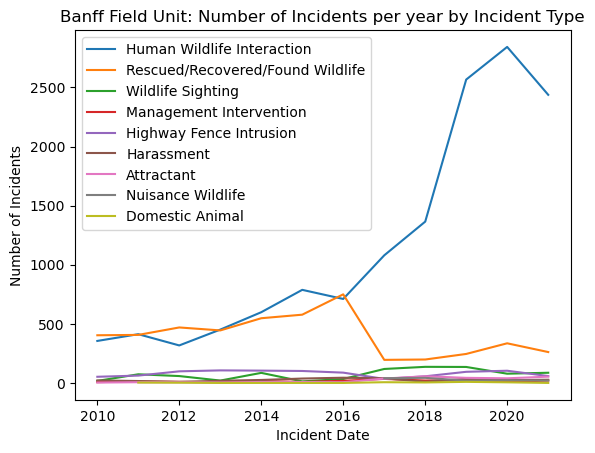

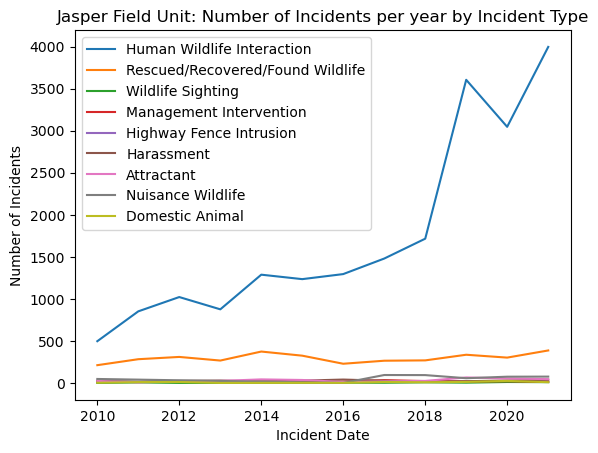

In [105]:

plt.plot(Banff_HWI_Y_PLOT, label = "Human Wildlife Interaction")
plt.plot(Banff_RRFW_Y_PLOT, label = "Rescued/Recovered/Found Wildlife")
plt.plot(Banff_WS_Y_PLOT, label = "Wildlife Sighting")
plt.plot(Banff_MI_Y_PLOT, label = "Management Intervention")
plt.plot(Banff_HFI_Y_PLOT, label = "Highway Fence Intrusion")
plt.plot(Banff_H_Y_PLOT, label = "Harassment")
plt.plot(Banff_A_Y_PLOT, label = "Attractant")
plt.plot(Banff_NW_Y_PLOT, label = "Nuisance Wildlife")
plt.plot(Banff_DA_Y_PLOT, label = "Domestic Animal")
plt.xlabel("Incident Date")
plt.ylabel("Number of Incidents")
plt.legend(loc="upper left")
plt.title("Banff Field Unit: Number of Incidents per year by Incident Type")
plt.show()

plt.plot(Jasper_HWI_Y_PLOT, label = "Human Wildlife Interaction")
plt.plot(Jasper_RRFW_Y_PLOT, label = "Rescued/Recovered/Found Wildlife")
plt.plot(Jasper_WS_Y_PLOT, label = "Wildlife Sighting")
plt.plot(Jasper_MI_Y_PLOT, label = "Management Intervention")
plt.plot(Jasper_HFI_Y_PLOT, label = "Highway Fence Intrusion")
plt.plot(Jasper_H_Y_PLOT, label = "Harassment")
plt.plot(Jasper_A_Y_PLOT, label = "Attractant")
plt.plot(Jasper_NW_Y_PLOT, label = "Nuisance Wildlife")
plt.plot(Jasper_DA_Y_PLOT, label = "Domestic Animal")
plt.xlabel("Incident Date")
plt.ylabel("Number of Incidents")
plt.legend(loc="upper left")
plt.title("Jasper Field Unit: Number of Incidents per year by Incident Type")
plt.show()

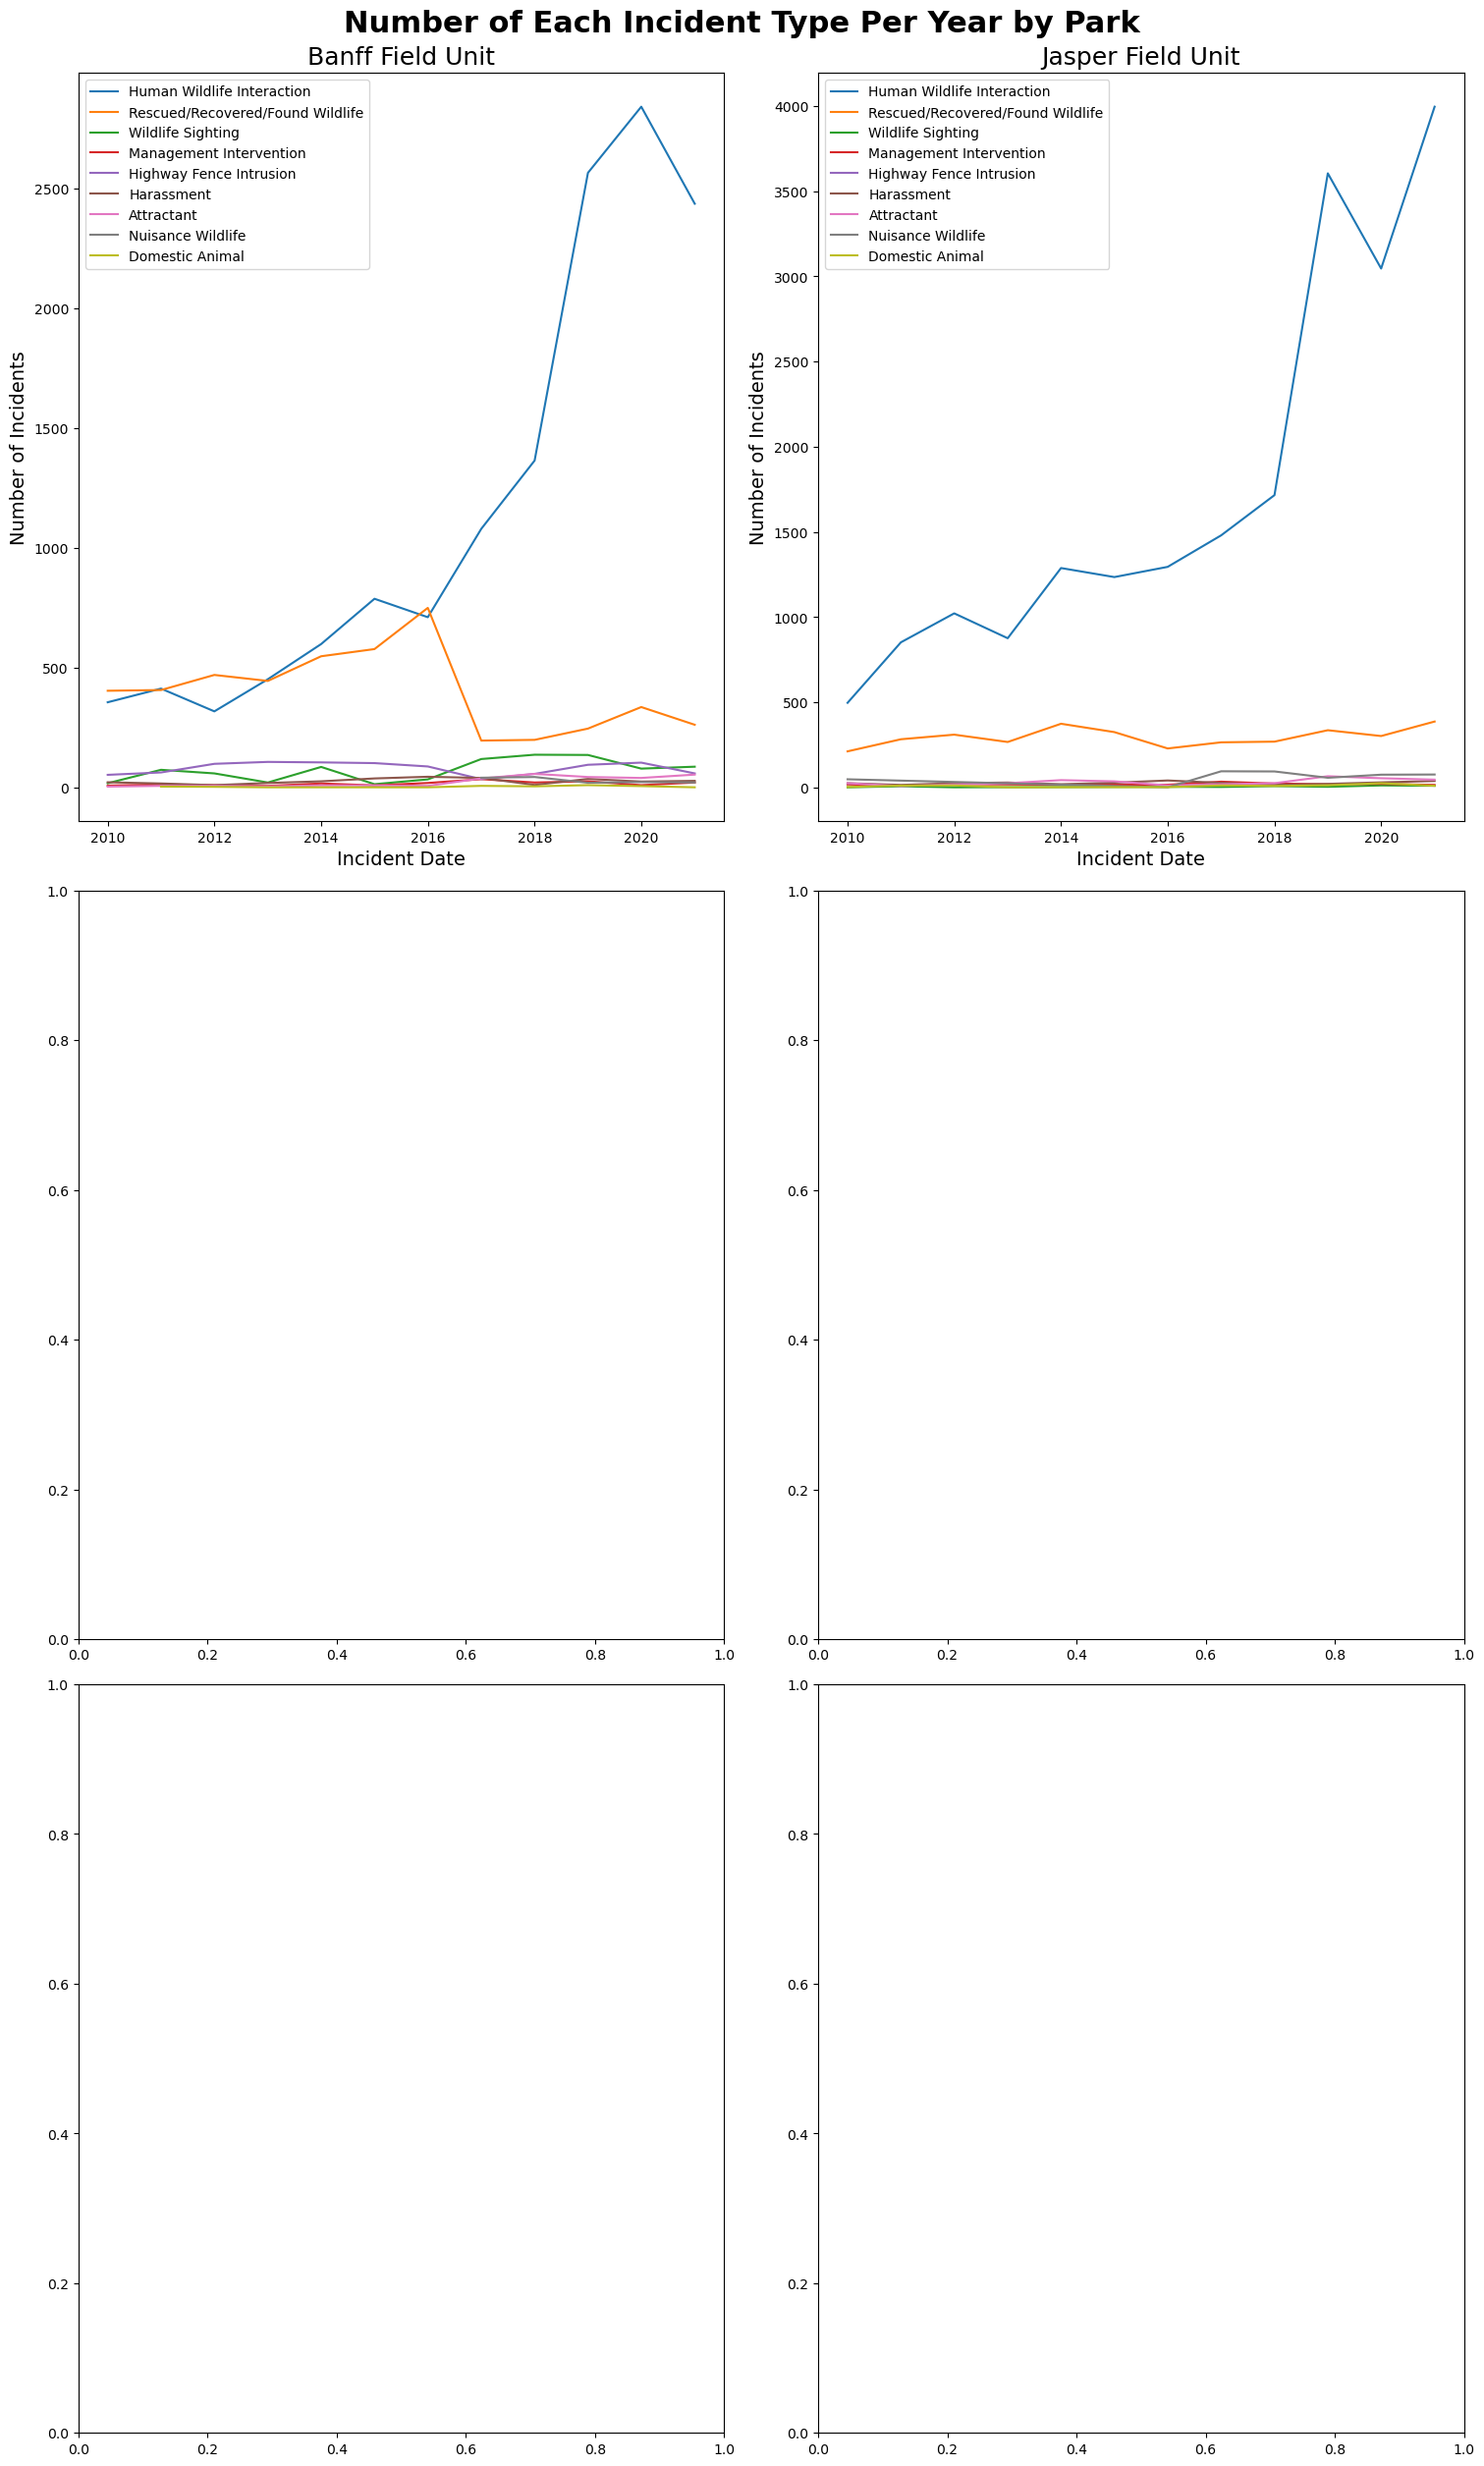

In [141]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,25), constrained_layout=True)

axs[0,0].set_title("Banff Field Unit", size=18)
axs[0,1].set_title("Jasper Field Unit", size=18)

axs[0,0].plot(Banff_HWI_Y_PLOT, label = "Human Wildlife Interaction")
axs[0,0].plot(Banff_RRFW_Y_PLOT, label = "Rescued/Recovered/Found Wildlife")
axs[0,0].plot(Banff_WS_Y_PLOT, label = "Wildlife Sighting")
axs[0,0].plot(Banff_MI_Y_PLOT, label = "Management Intervention")
axs[0,0].plot(Banff_HFI_Y_PLOT, label = "Highway Fence Intrusion")
axs[0,0].plot(Banff_H_Y_PLOT, label = "Harassment")
axs[0,0].plot(Banff_A_Y_PLOT, label = "Attractant")
axs[0,0].plot(Banff_NW_Y_PLOT, label = "Nuisance Wildlife")
axs[0,0].plot(Banff_DA_Y_PLOT, label = "Domestic Animal")
axs[0,0].set_xlabel("Incident Date", size=14)
axs[0,0].set_ylabel("Number of Incidents", size=14)
axs[0,0].legend(loc="upper left")


axs[0,1].plot(Jasper_HWI_Y_PLOT, label = "Human Wildlife Interaction")
axs[0,1].plot(Jasper_RRFW_Y_PLOT, label = "Rescued/Recovered/Found Wildlife")
axs[0,1].plot(Jasper_WS_Y_PLOT, label = "Wildlife Sighting")
axs[0,1].plot(Jasper_MI_Y_PLOT, label = "Management Intervention")
axs[0,1].plot(Jasper_HFI_Y_PLOT, label = "Highway Fence Intrusion")
axs[0,1].plot(Jasper_H_Y_PLOT, label = "Harassment")
axs[0,1].plot(Jasper_A_Y_PLOT, label = "Attractant")
axs[0,1].plot(Jasper_NW_Y_PLOT, label = "Nuisance Wildlife")
axs[0,1].plot(Jasper_DA_Y_PLOT, label = "Domestic Animal")
axs[0,1].set_xlabel("Incident Date", size=14)
axs[0,1].set_ylabel("Number of Incidents", size=14)
axs[0,1].legend(loc="upper left")


fig.suptitle("Number of Each Incident Type Per Year by Park", fontweight="bold", size=22)
plt.show()